# Lesson 3: Statistics and Significance

## Ideas

1. What is statistics?
2. How is statistics related to probability?

## Terminology Recap

See PA 2.1.1, PA 2.2.2, and PA 2.4.2:
- **sample:** one measurement of a certain unit
- **sample size:** number of measurements
- **population:** group that we're sampling from
- **parameter ($\pi$):** any measured quantity of an entire population
- **variable ($x$):** the actual sample's measurement


See PA 2.1.5 and PA 2.3.3:
- **model:** mathematical model that's data-driven
- **chance model:** probabilistic model based on heuristics or assumptions
- **statistical inference:** assumptions made based on our data and statistical model
- **statistical significance:** strength or measure of confidence of model


- **measures of center (dataset tendency or dispersion):** tendency to "gravitate" toward a value
- **mean:** arithmetic mean of the dataset
- **median:** exact middle of the dataset
- **mode:** maximum-repeated value of the dataset
- **outlier:** in frequentist terms, deviated data

## Sampling (PA 2.2.5)

- **simple random sampling:** take random from the population
- **systematic (monotonic) sampling:** take every x sample from the population
- **stratified sampling:** group out and take some k subset from each group
- **cluster sampling:** randomly choose one group
- **convenience sampling:** whatever samples you can get

## Statistical Testing (PA 2.4.6, 2.6.2, 2.6.3)

- **null hypothesis ($H_0$):** process is random chance
- **alternative hypothesis ($H_A$):** process is not random chance
- **standardized statistic ($z$):**  $\frac{\bar{x} - \pi_0}{\hat{\pi_0}}$ where $\hat{\pi_0} = \sqrt{\pi(1 - \pi)/n}$
- **p-value:** probability of obtaining an extreme value (outside of the distribution) assuming $H_0$ is true

![p-value closeness to random, z-score is distance from random](https://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-statistics-toolbox/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png)

- How does sample size affect these (PA 2.6.7)?
- Are $H_A : \pi > 0.5$ and $H_A : \pi \ne 0.5$ the same?

## Let's do some statistical inference!

So what are we really trying to do with statistics?

Is there a difference between **binary** (categorical) data and numerical data?

Let's analyze the dataset in `bac.csv`!  This dataset contains two columns of interest: `BAC` and `PASS`.  It is a dataset that indicates the `BAC` (numerical continuous data) and `PASS`, whether the subject passed the field sobriety test (binary data).  We need to make a third column for whether or not the subject truly failed (binary variable), based on if BAC >= 0.08.  All subjects tested were pulled over on suspicion of driving under the influence (DUI) by a police officer.

### 1. What research questions can we ask?  What type of data do we have here?

**Q1:** Is a police officer able to use driver behavior to predict DUI better than random chance?

In this assumption, we assume that every driver pulled over is DUI. The hypotheses are formed:

$H_0(\text{pulled\_over\_correctly}): \pi = 0.5$

$H_A(\text{pulled\_over\_correctly}): \pi \gt 0.5$.



**Q2:** An alternative question could be to ask whether a sobriety test is better than random chance at predicting whether someone is biologically drunk, based on suspicions by police officers on drunk driving.

This means that the null hypothesis for the sobriety test correctness is a mean that is better than random chance (50% chance).  The following hypotheses are formed as a result of this question.

$H_0(\text{sobriety\_test\_correctness}): \pi = 0.5$

$H_A(\text{sobriety\_test\_correctness}): \pi \gt 0.5$


### 2. What preliminary metrics (statistics) should we compute?
Mean, standard deviation, histogram.

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_bac = pd.read_csv("../as_datasets/bac.csv")
print(df_bac.head())

   Subject       BAC  PASS   forpass      pred  pass.ols  PASS.OLS
0       54  0.000344     1  0.518128  0.971148         0         0
1       94  0.000523     1  0.464620  0.970857         0         0
2       72  0.001530     1  0.797098  0.969166         0         1
3        1  0.001819     1  0.327069  0.968663         0         0
4       49  0.001850     1  0.546285  0.968608         0         0


It looks like there are some column names that are not too descriptive.  Let's also remove some columns that we do not need.

In [14]:
# rename the column "PASS" to "sobriety_test_pass", since that's what it means.
df_bac['sobriety_test_pass'] = df_bac['PASS']

Then, let's add our better column name and remove the columns we do not want.

In [15]:
# make some columns we care about, we have to convert booleans to numbers
df_bac['truly_legal'] = (df_bac['BAC'] < 0.08).astype('int')
df_bac['sobriety_test_correct'] = (df_bac['truly_legal'] == df_bac['sobriety_test_pass']).astype('int')

# if we pulled over correctly, then it's the inverse of truly_legal
df_bac['pulled_over_correctly'] = 1 - df_bac['truly_legal']

# overwrite the dataframe with one that we prefer, with a list of columns
df_bac = df_bac[['BAC', 'sobriety_test_pass', 'truly_legal', 
                 'sobriety_test_correct', 'pulled_over_correctly']]  

print(df_bac.head())
print(df_bac['BAC'].describe())
print(df_bac['sobriety_test_pass'].describe())
print(df_bac['truly_legal'].describe())
print(df_bac['sobriety_test_correct'].describe())
print(df_bac['pulled_over_correctly'].describe())

        BAC  sobriety_test_pass  truly_legal  sobriety_test_correct  \
0  0.000344                   1            1                      1   
1  0.000523                   1            1                      1   
2  0.001530                   1            1                      1   
3  0.001819                   1            1                      1   
4  0.001850                   1            1                      1   

   pulled_over_correctly  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
count    100.000000
mean       0.048608
std        0.029461
min        0.000344
25%        0.020906
50%        0.050542
75%        0.071378
max        0.099219
Name: BAC, dtype: float64
count    100.000000
mean       0.610000
std        0.490207
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sobriety_test_pass, dtype: float64
count    100.000000
mean

<AxesSubplot:xlabel='pulled_over_correctly', ylabel='Count'>

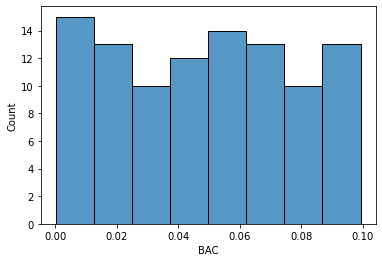

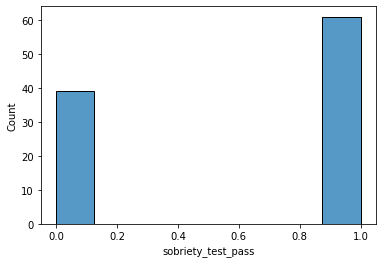

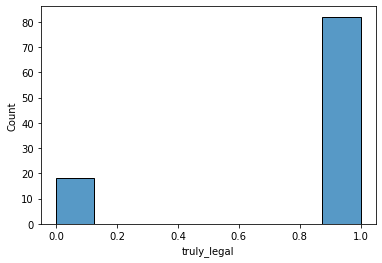

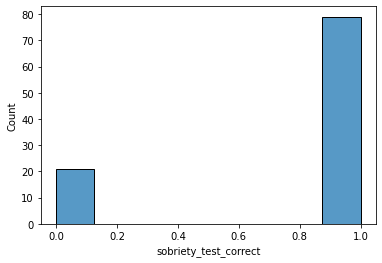

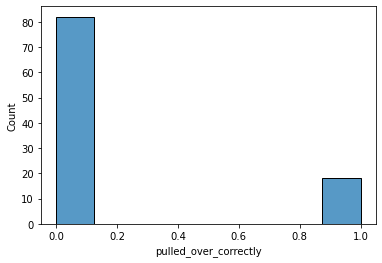

In [16]:
plt.figure()
sns.histplot(df_bac['BAC'])

plt.figure()
sns.histplot(df_bac['sobriety_test_pass'])

plt.figure()
sns.histplot(df_bac['truly_legal'])

plt.figure()
sns.histplot(df_bac['sobriety_test_correct'])

plt.figure()
sns.histplot(df_bac['pulled_over_correctly'])

Upon looking at the histograms, it does not appear that BAC is very distinguished between samples.  However, there is a massive difference where BAC is used to determine whether someone is truly legal.  There is a higher proportion of subjects passing the sobriety test.  Let's compute the proportions so we can see more quantitatively the difference between failing a sobriety test and truly driving under the influence, and whether the original suspicions were correct:

In [17]:
proportion_pulled_correct = sum(df_bac['pulled_over_correctly'] == 1.0) / df_bac['pulled_over_correctly'].count()
proportion_pulled_wrong = 1.0 - proportion_pulled_correct
print(f'The proportion pulled over correctly: {proportion_pulled_correct}')
print(f'The proportion pulled over incorrectly: {proportion_pulled_wrong}')

proportion_test_correct = sum(df_bac['sobriety_test_correct'] == 1.0) / df_bac['sobriety_test_correct'].count()
proportion_test_wrong = 1.0 - proportion_test_correct
print(f'The proportion sobriety test correct: {proportion_test_correct}')
print(f'The proportion sobriety test incorrect: {proportion_test_wrong}')

The proportion pulled over correctly: 0.18
The proportion pulled over incorrectly: 0.8200000000000001
The proportion sobriety test correct: 0.79
The proportion sobriety test incorrect: 0.20999999999999996


It seems that indeed, the proportion of drivers pulled over by the police officers were primarily not drunk.

Now, let's compute the Z-score for the mean of the variable of officers' intuition correctly pulling over drunk drivers, to see if there is a difference between random chance and the police officers' intuition.

In [ ]:
pulled_mean = df_bac['pulled_over_correctly'].mean()  # model sample mean
null_mean = 0.5  # chance model, that randomly pulling over will give a drunk driver
null_std = np.sqrt(null_mean * (1 - null_mean) / df_bac['pulled_over_correctly'].count())

z_1 = (pulled_mean - null_mean) / null_std
print(f"Z-score for difference of police officers' intuition and random chance: {z_1}")


It looks like that the data we have is definitely not due to random chance.  There is indeed significance, since the Z-score is quite large (greater than +/- 2.0).  Thus, the proportion that 18% of officers' intuition being correct is statistically significant.

Now, let's compute the Z-score for the variable of the sobriety test being correct.

In [ ]:
test_correct_mean = df_bac['sobriety_test_correct'].mean()
null_mean = 0.5  # chance model, that it can go either way
null_std = np.sqrt(null_mean * (1 - null_mean) / df_bac['sobriety_test_correct'].count())

z_1 = (test_correct_mean - null_mean) / null_std
print(f'Z-score for difference between the sobriety test and random chance: {z_1}')


It looks like the Z-score for sobriety test correct shows significance, since it is also quite large.  This means that the 79% indication of the sobriety test being correct is statistically significant.

### 3. What statistical inferences can we draw?
The variable of a driver being pulled over correctly due to officers' intuition of 18% was statistically significant.  The variable of the sobriety test being correct more than random chance of 79% was statistically significant.

### 4. Can we make any statistically-significant conclusions?
We can conclude that the police officers in this dataset do not necessarily have great intuition when it comes to using intuition to detect drunk drivers.  However, sobriety tests seem to be effective for detection of high BACs.

### 5. How could we improve this study?
Please try to think of some ideas :)